# **Custos Médicos - Regressão Linear Multipla**

A ideia neste problema é estimar o custo do seguro no plano de saúde para uma pessoa com base em dados adicionais como idade, si é fumante ou não, se tem dependentes, etc.

Isto quer dizer que temos considerar que nuestra variável dependiente será o **_Custo_** e as caraterísticas restantes serão consideradas como as variáveis independientes, em outras palavras Custo depende (umas vezes mais e outras menos) de todas as outras variáveis

O Primeiro a fazer é estabelecer a influencia de todas essas variáveis (caraterísticas) no valor final dos Custos Médicos, de forma individual.

**_É importante lembrar que temos que ter a capacidade de predecir um valor de custo para uma nova pessoa (cliente) dados as suas proprias caraterísticas_.**

Iniciemos esta análise selecionando os dados que vamos a utilizar.


Vamos importar os dados:

# Importação dos dados:
Os dados podem ser obtido do site do Kaggle.com. Podemos fazer um download e depois abrir ou também importar diretamente usando um link onde esta o arquivo. Esses dados serão guardados na variável **dados** do tipo _dataframe_.

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
dados = pd.read_csv(url)
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Informações dos dados:

Obter informações gerais dos dados como número de variáveis, tipo, etc.     

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Podemos ver a primeira estatística dos dados usando -> _.describe_:

In [ ]:
dados.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Análise Exploratória de Dados:

Poderiamos fazer uma análise, olheando todas as variáveis uma por uma. Mas, temos no phyton uma ferramenta que permite fazer uma preanálise rápida.

Temos que instalar uma biblioteca -> *sweetviz*


In [ ]:
# instalando biblioteca de visualização

!pip install sweetviz 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sweetviz as sv

Depois de importar a biblioteca, definimos para  a nossa análise rápida a variável resposta ´**Custos**´, e observar se existe correlacão ou muita dependência com as outras variáveis.

In [ ]:
eda = sv.analyze(source = dados, target_feat = 'charges')

                                             |          | [  0%]   00:00 -> (? left)

Para fazer uma análise padrão usamos o comando  ->  *show_notebook() *

Presionando no botão de associations podemos a uma matriz de correlação entre todas as variáveis.

Vemos que:
 
* ser fumante (variável categórica) tem uma corelação muito forte com o preço.
* a idade e o índice de massa corporal tembém têm uma forte correlação.

Mas todas as nossa variáveis têm uma correlação positiva.


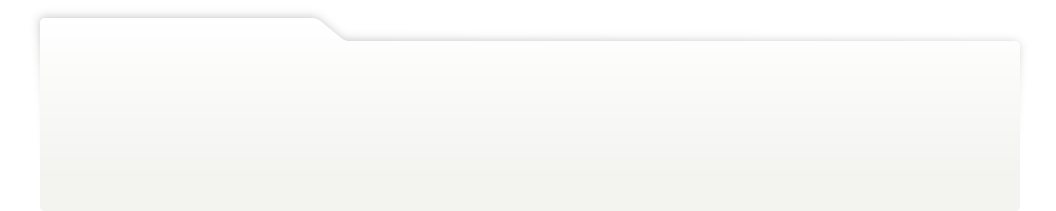
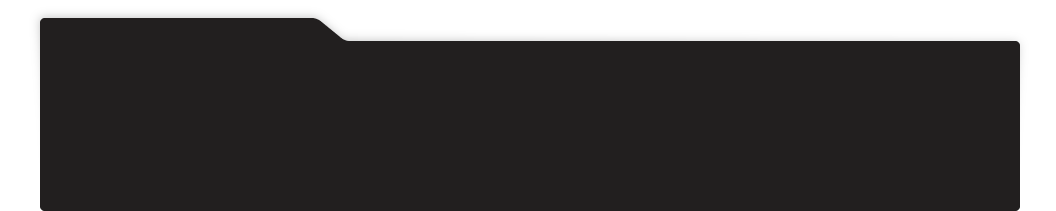
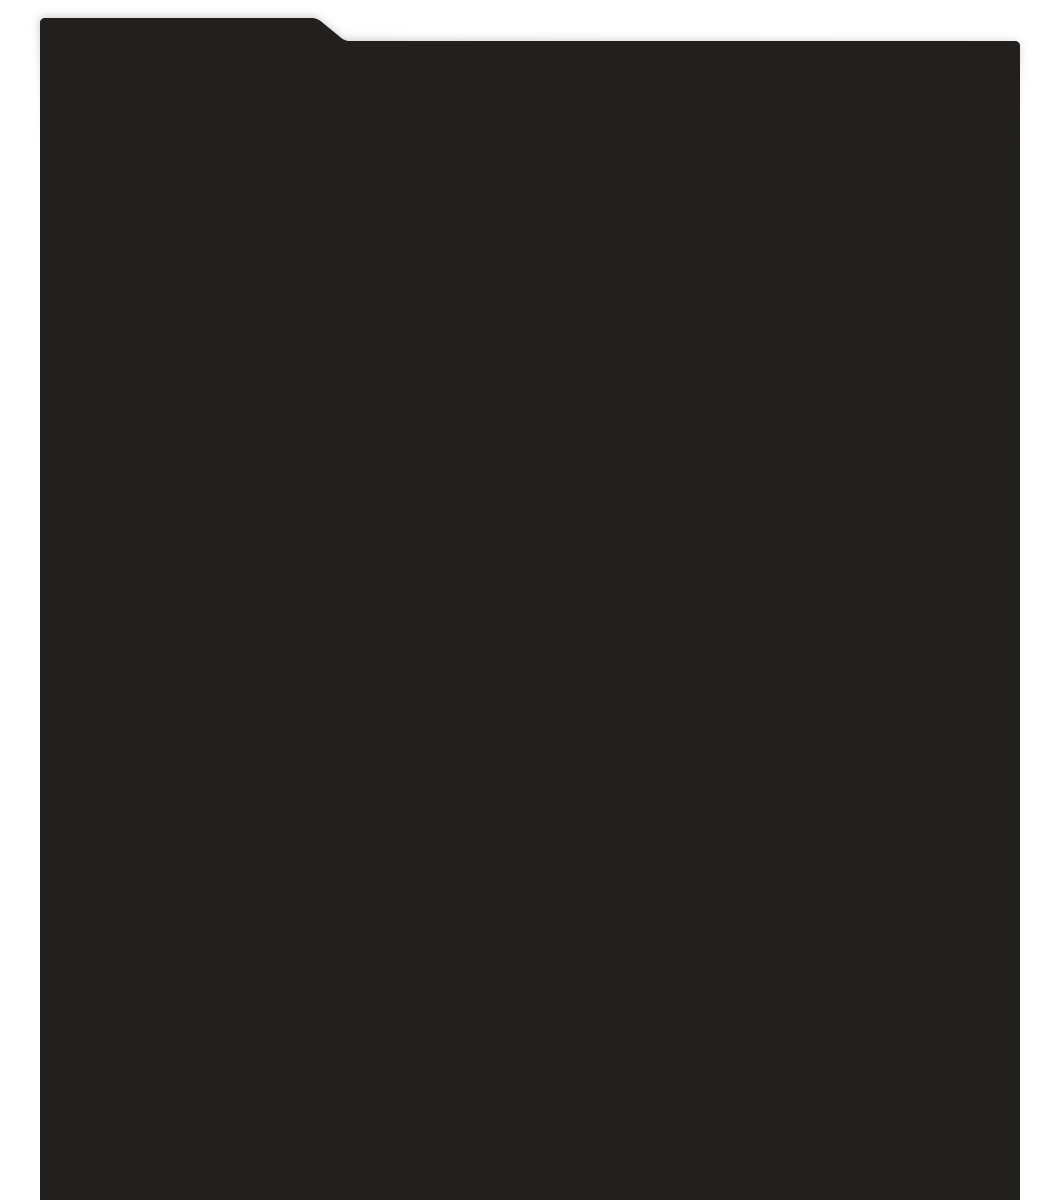
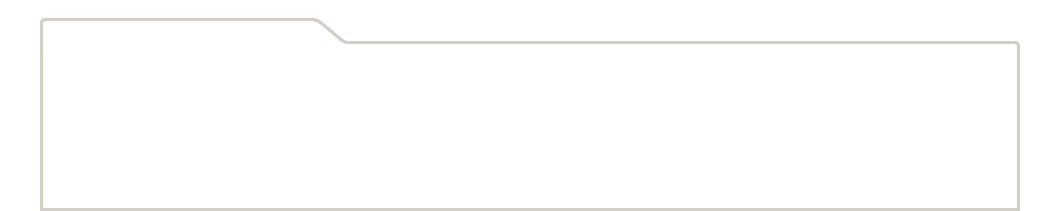
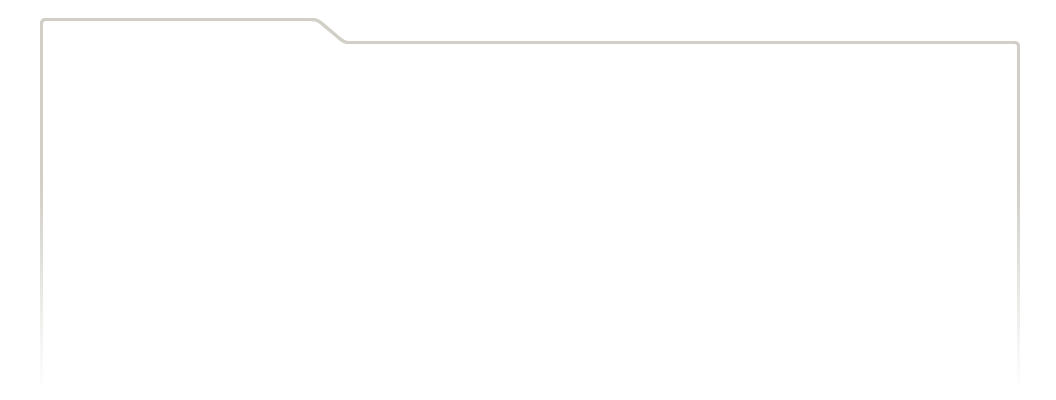
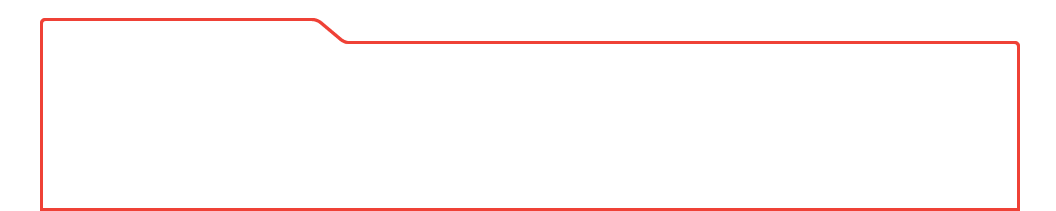
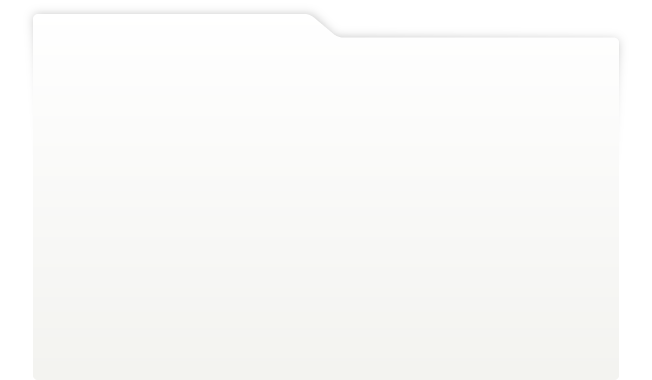
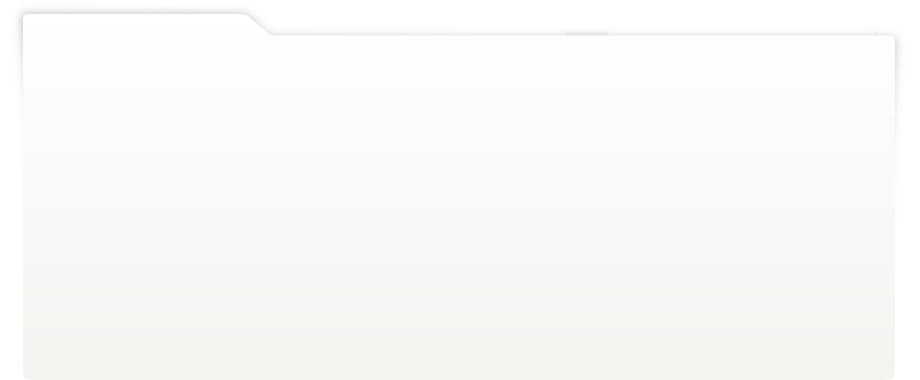
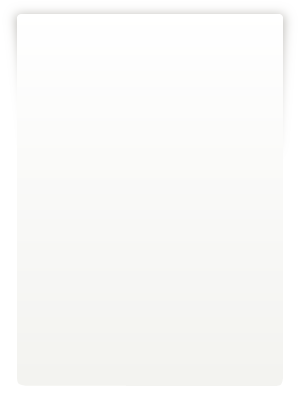
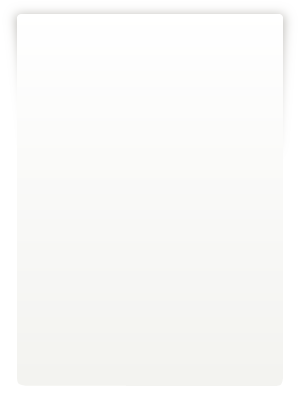
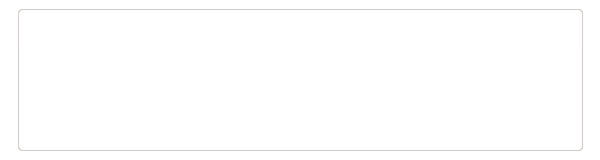
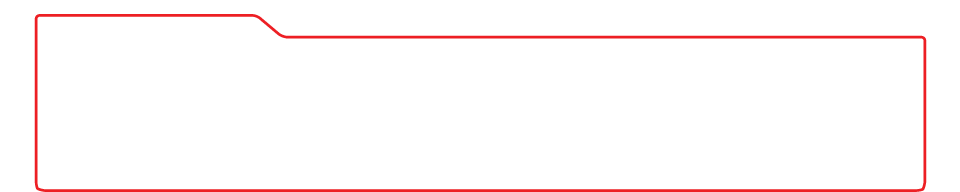
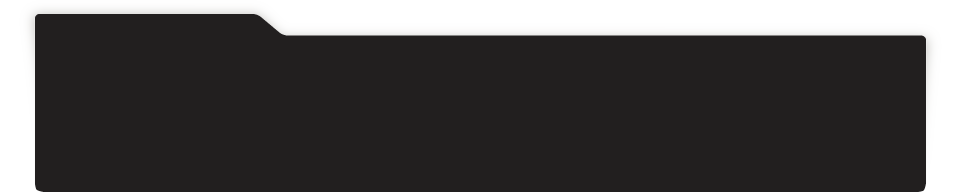
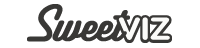
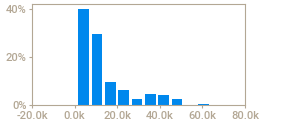
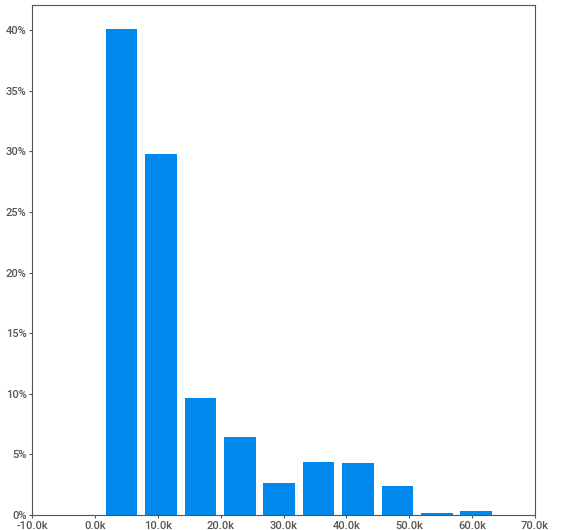
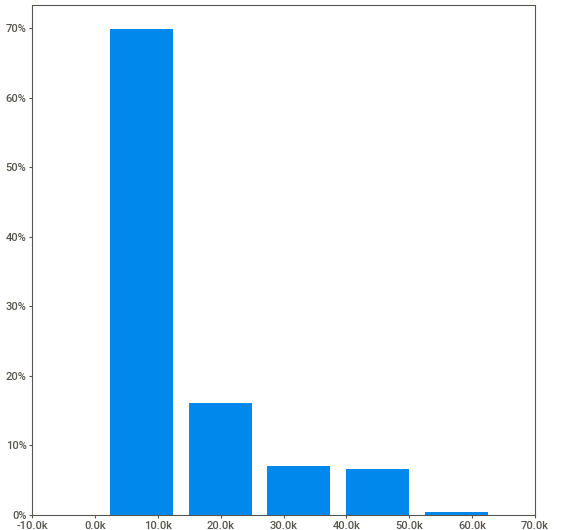
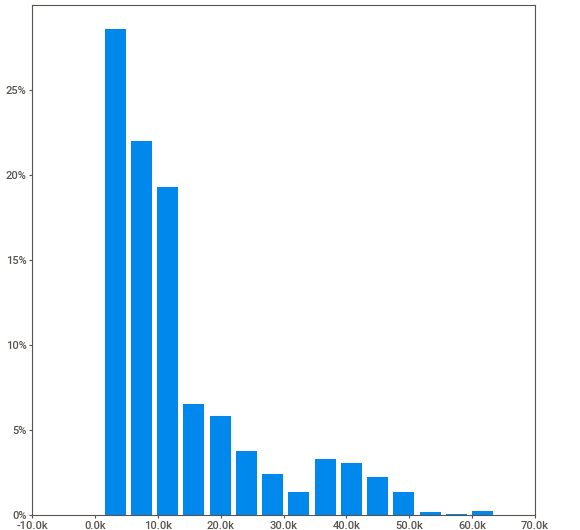
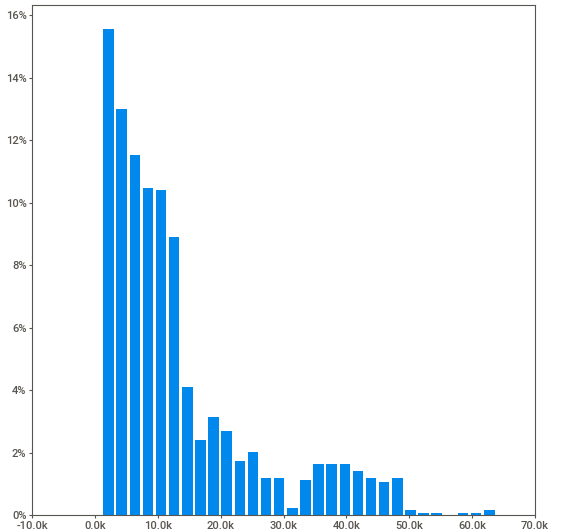
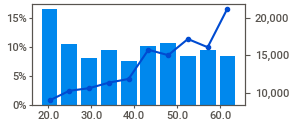
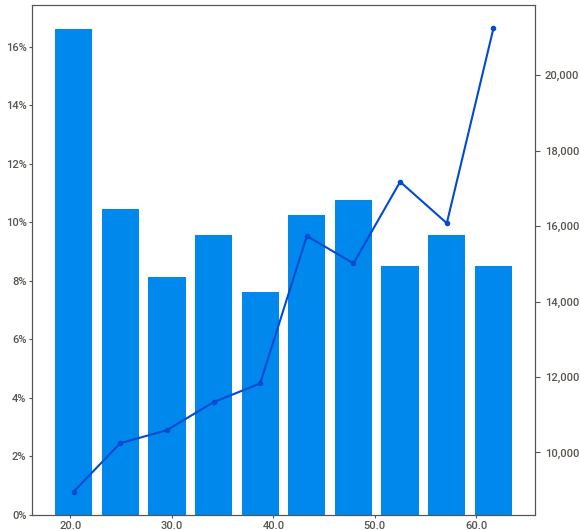
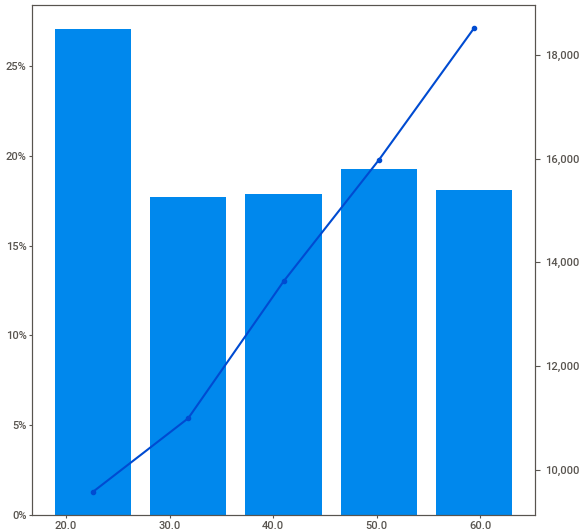
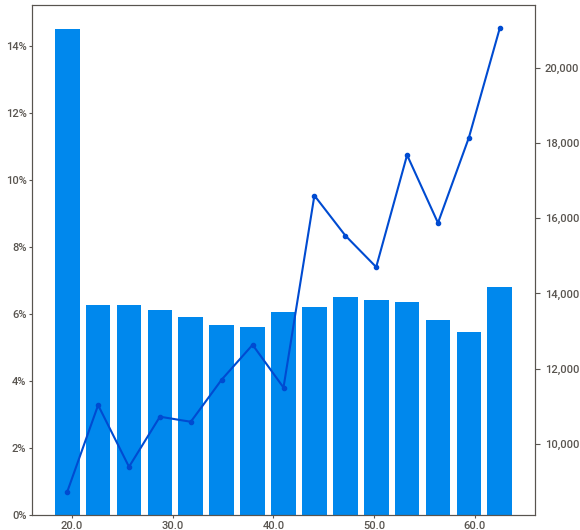
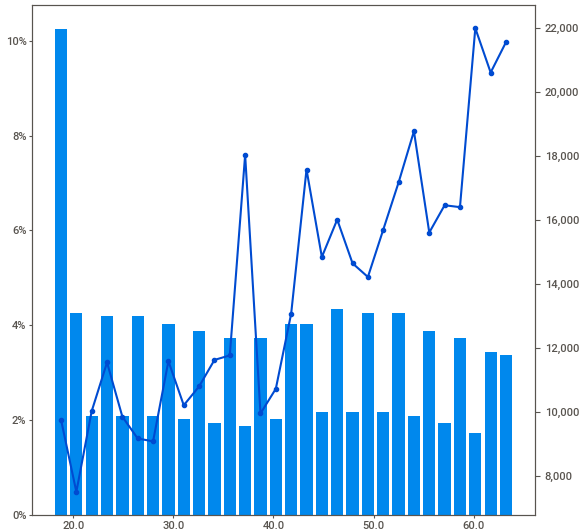
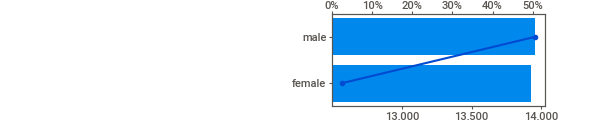
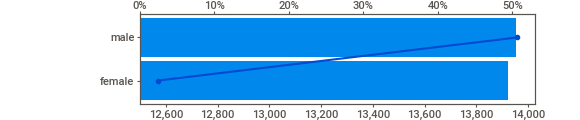
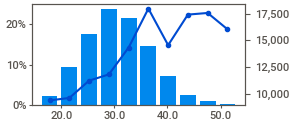
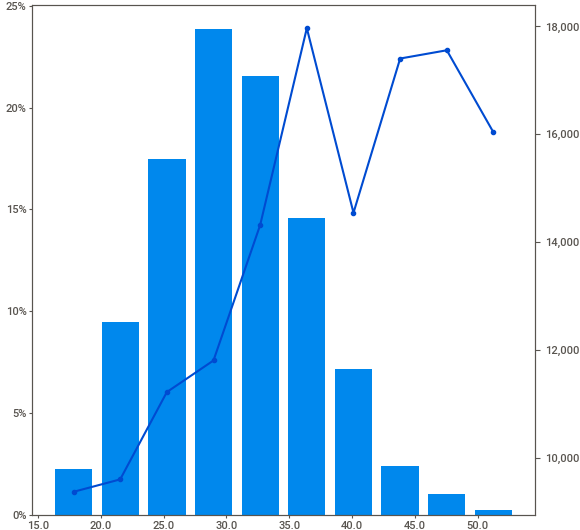
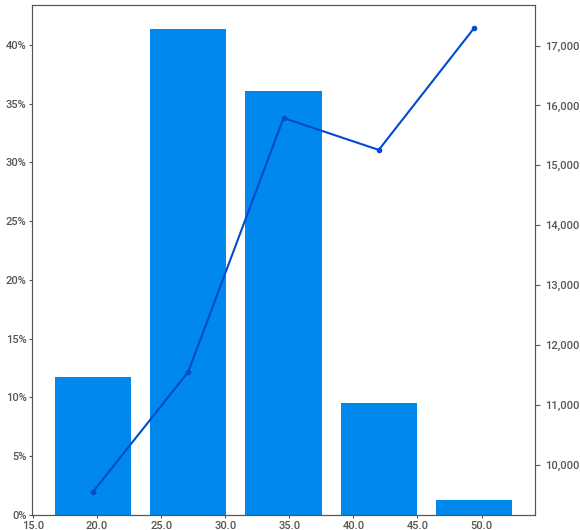
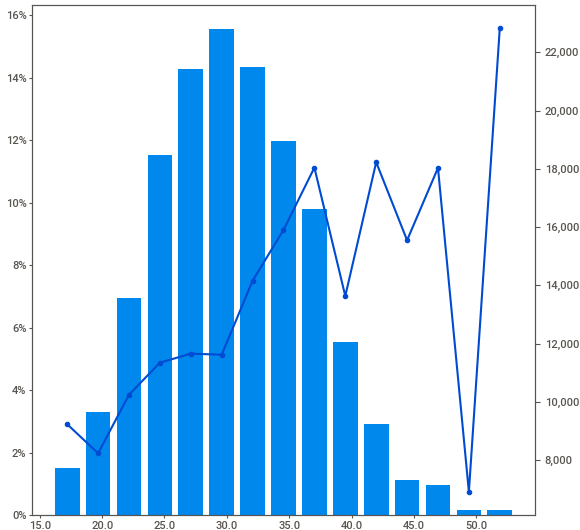
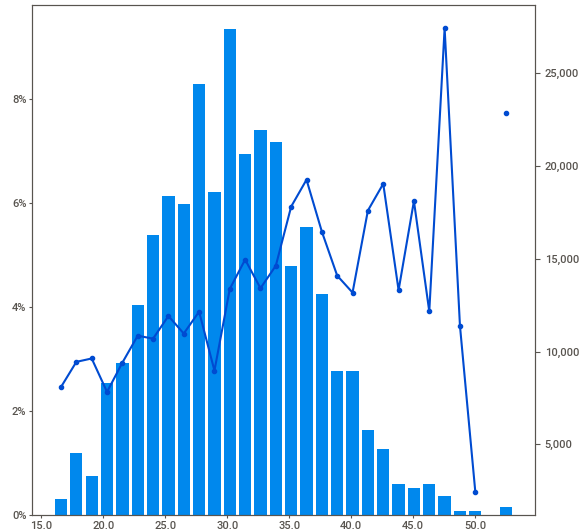
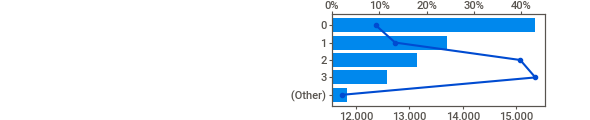
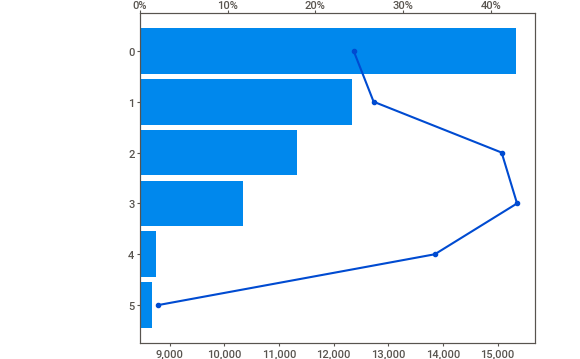
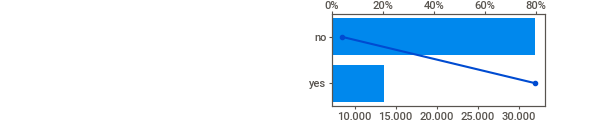
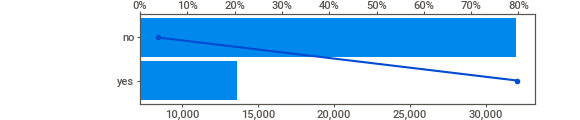
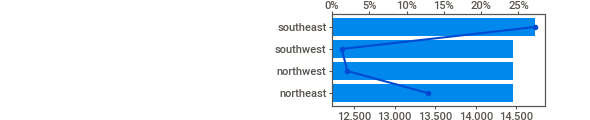
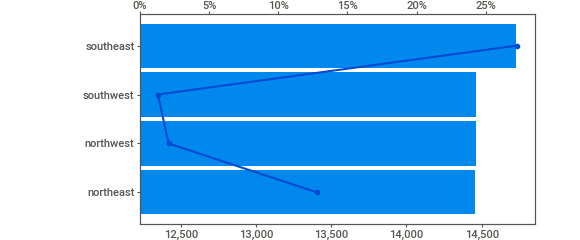
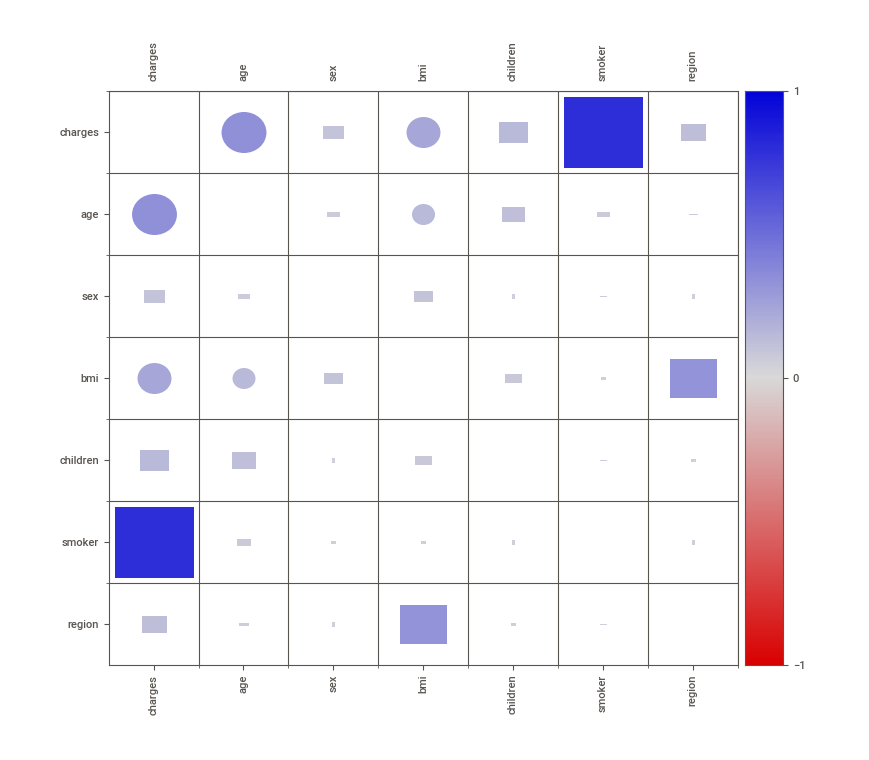
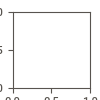

In [ ]:
eda.show_notebook()

In [ ]:
eda2 = sv.compare_intra(source_df = dados,
                              condition_series = dados['smoker'] == 'yes',
                              names = ['Fumante', 'Não-Fumante'],
                              target_feat = 'charges')

                                             |          | [  0%]   00:00 -> (? left)


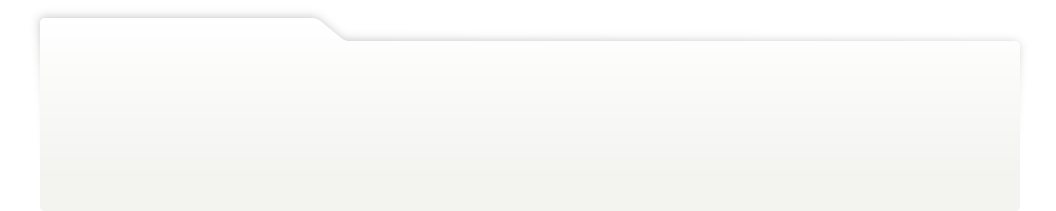
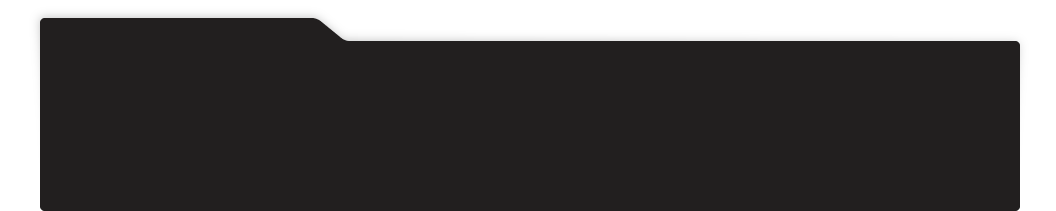
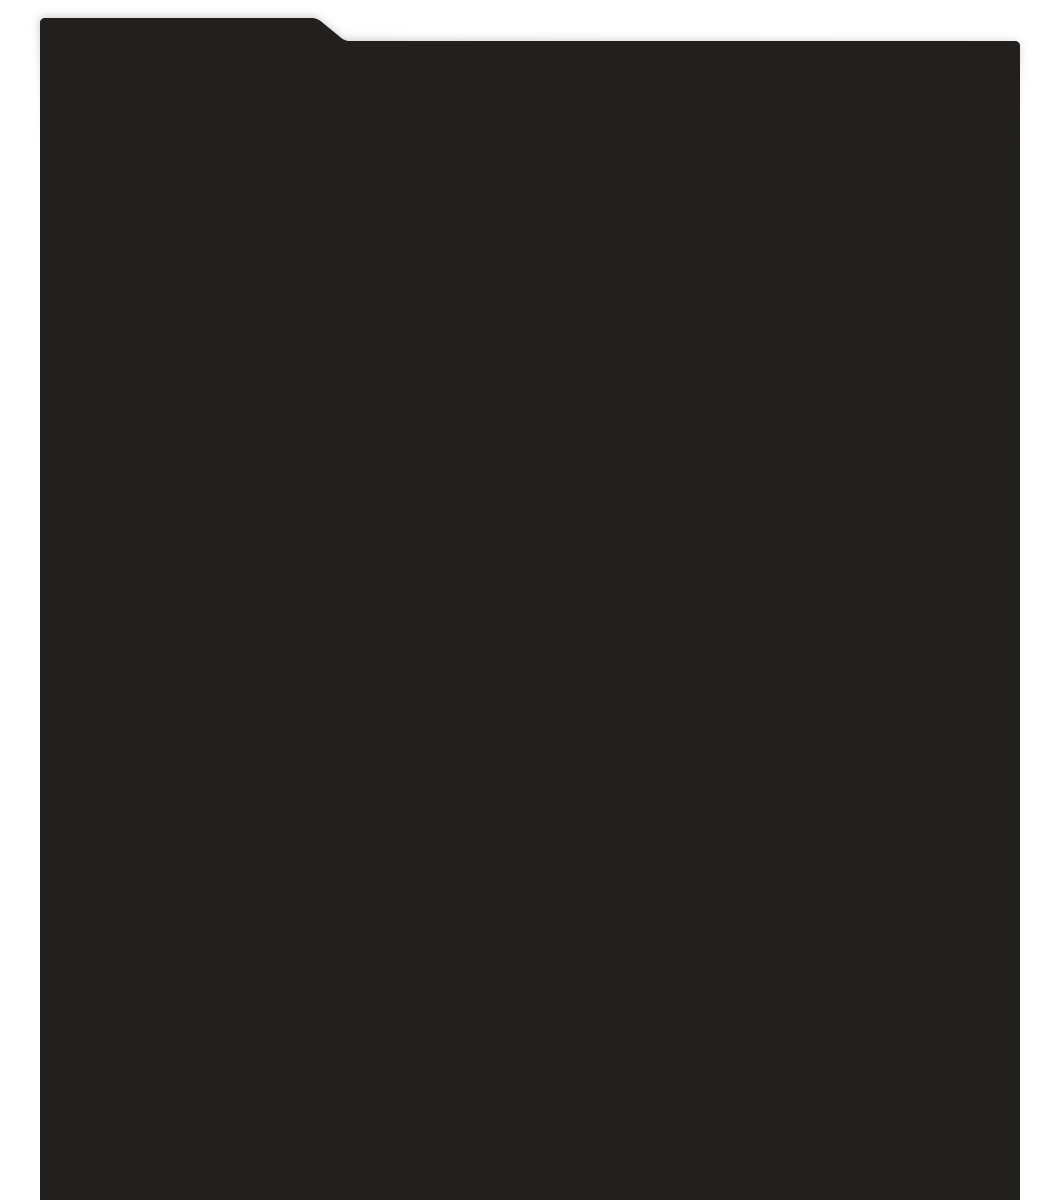
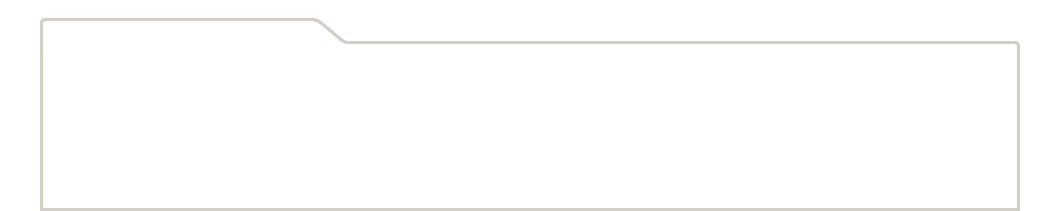
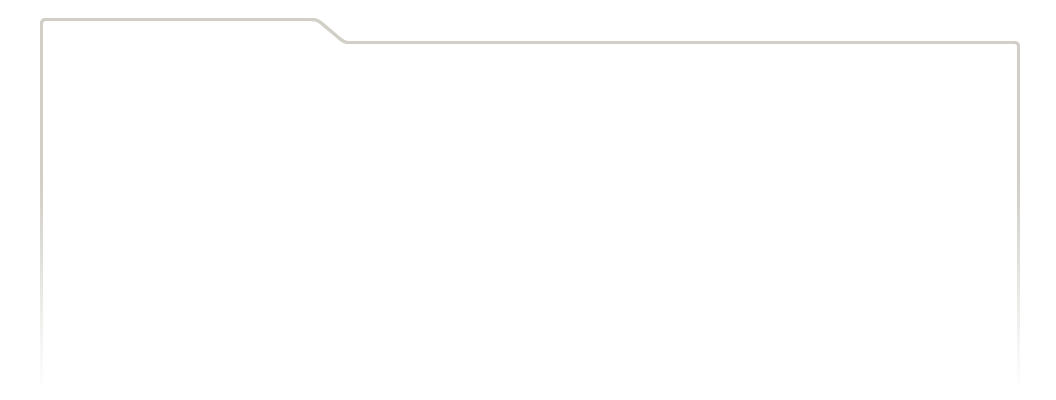
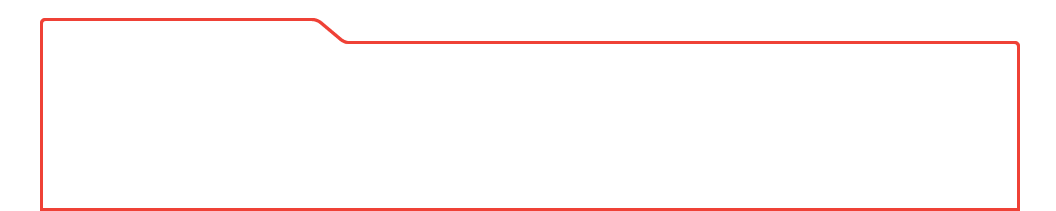
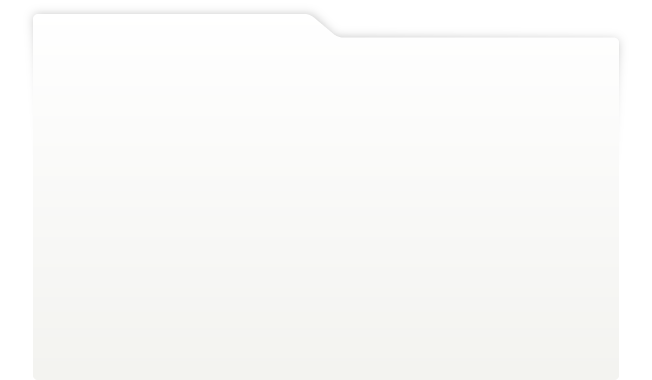
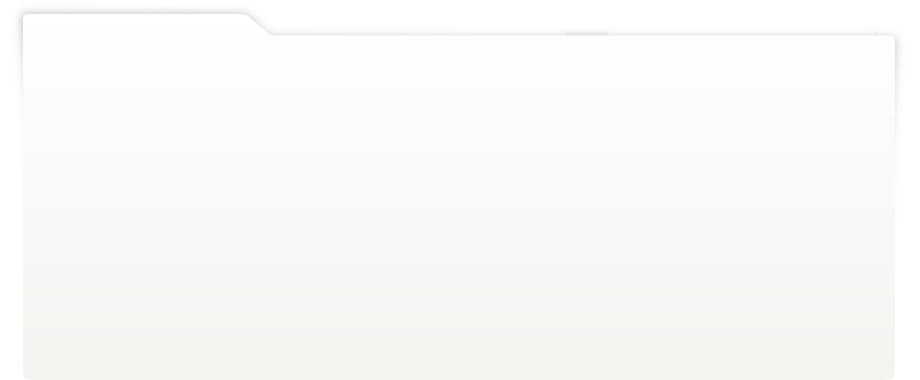
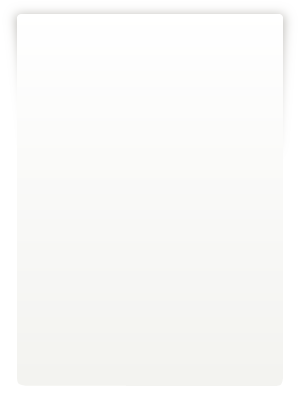
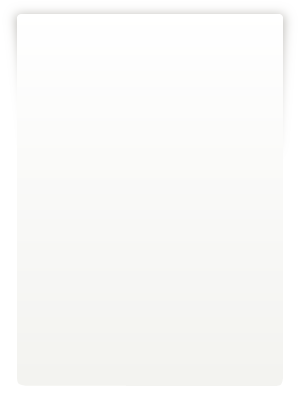
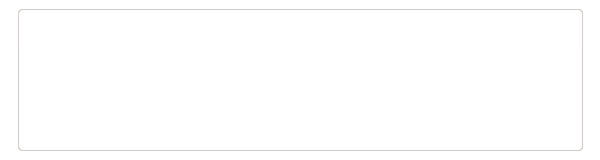
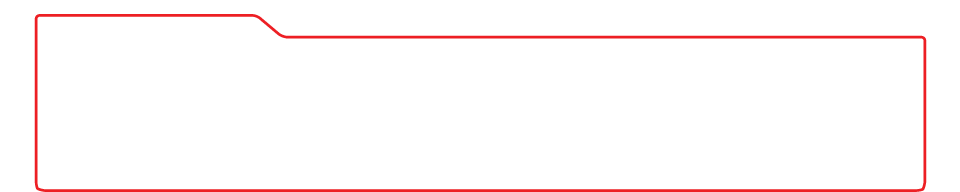
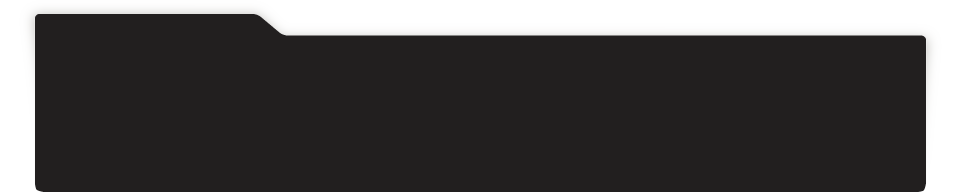
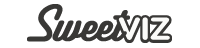
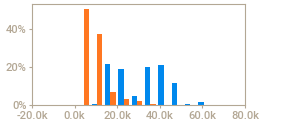
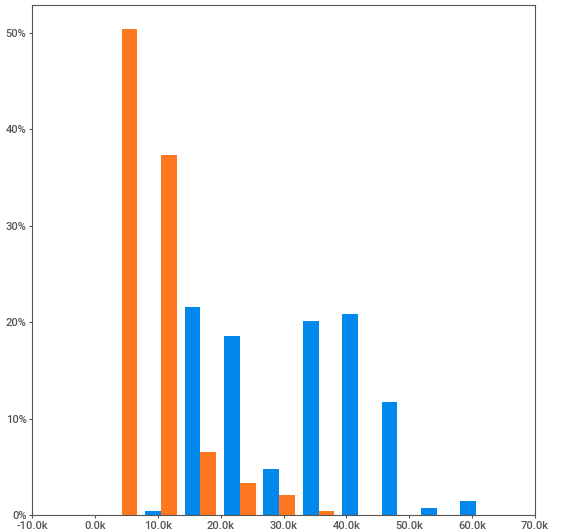
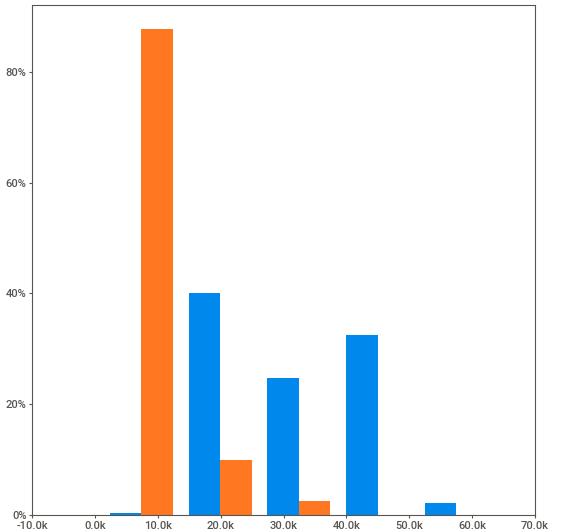
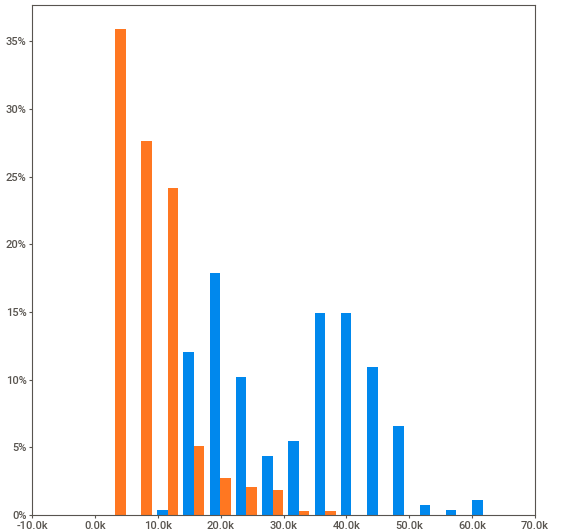
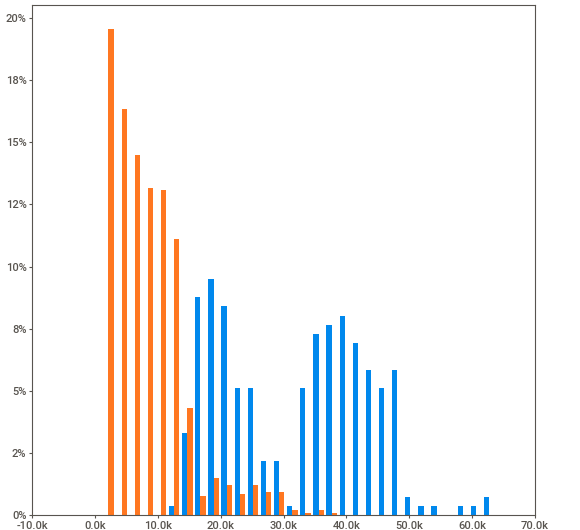
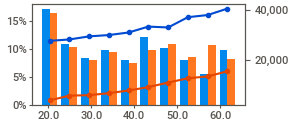
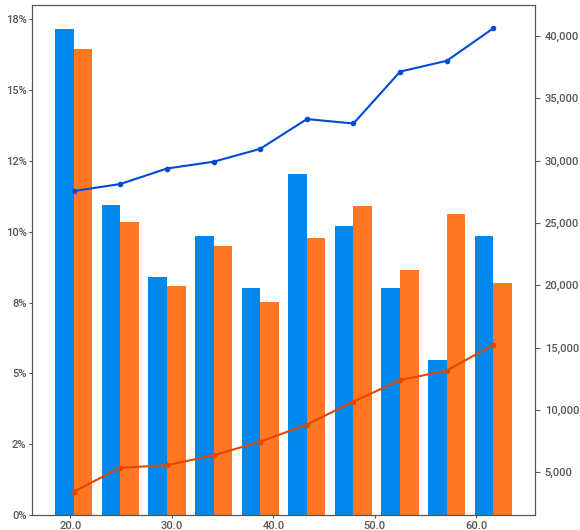
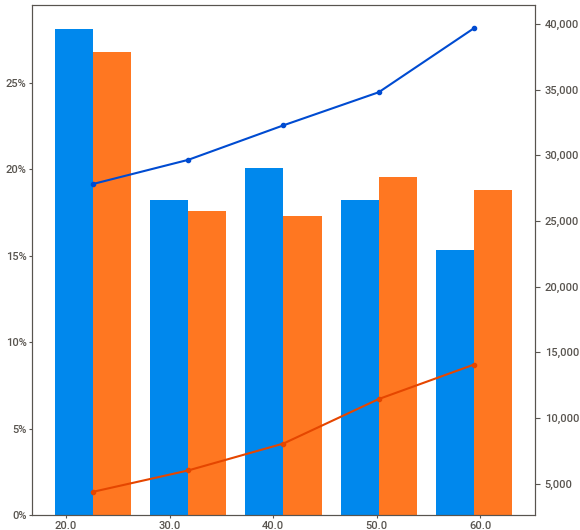
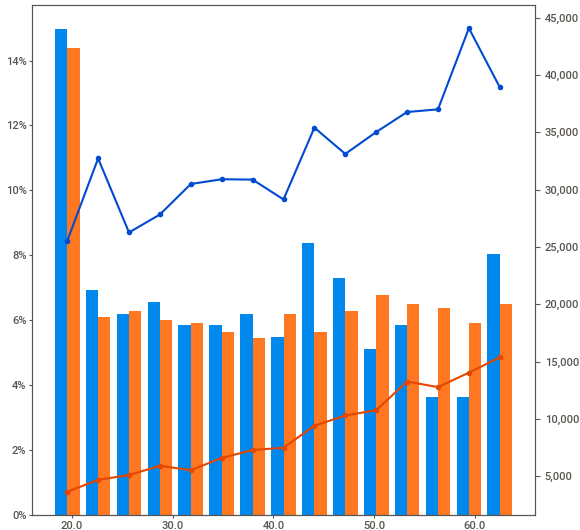
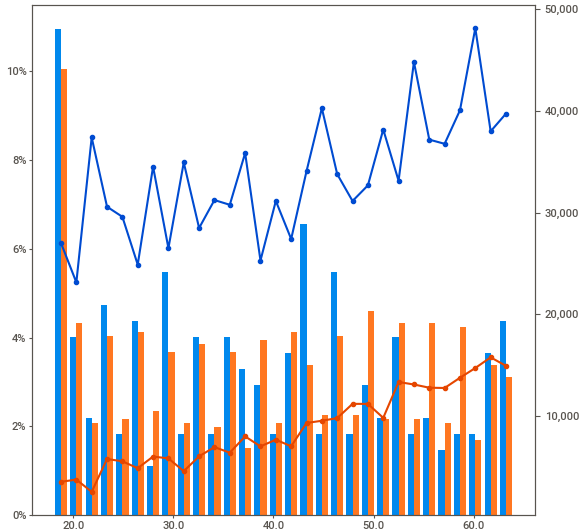
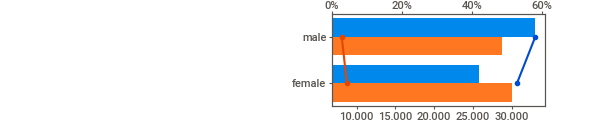
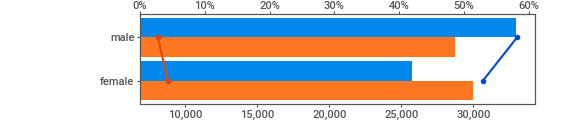
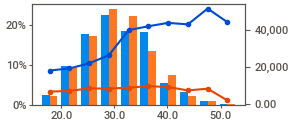
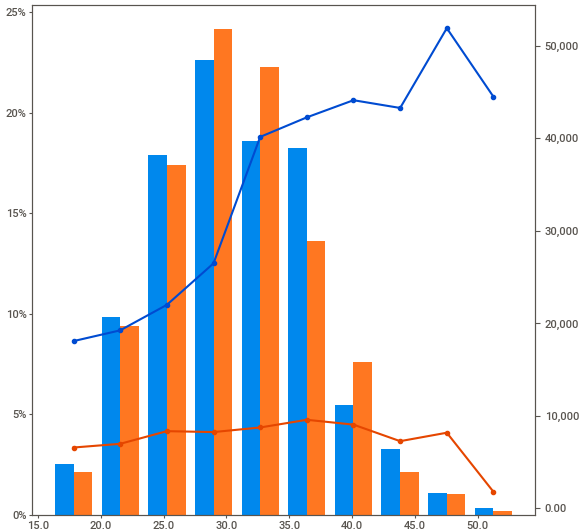
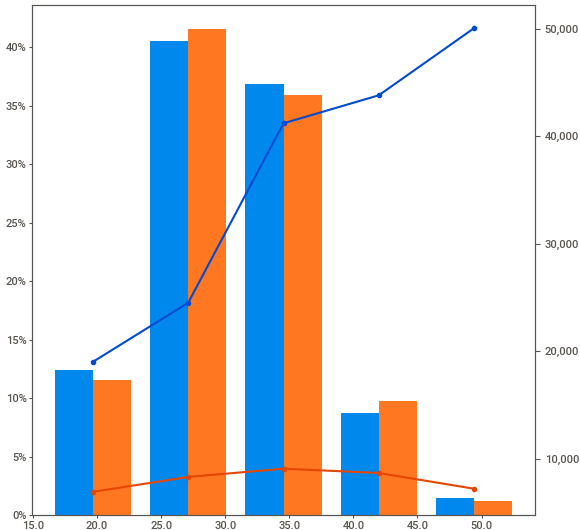
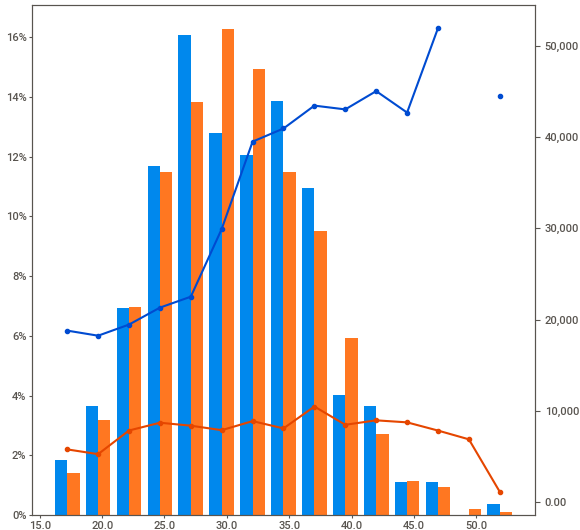
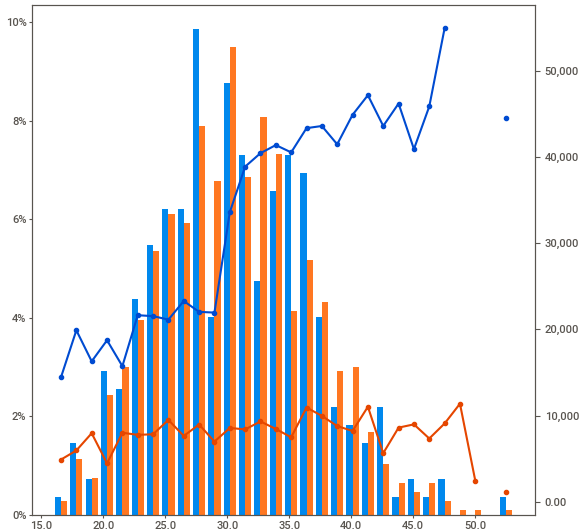
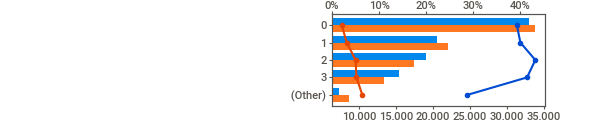
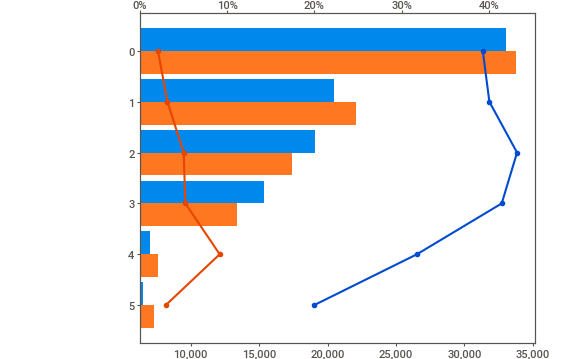
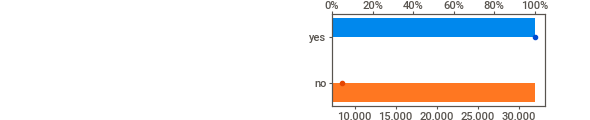
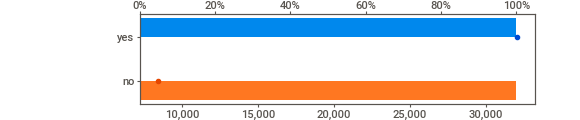
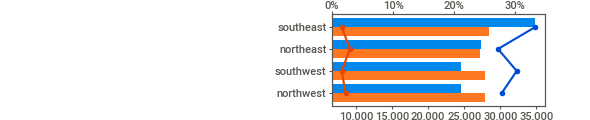
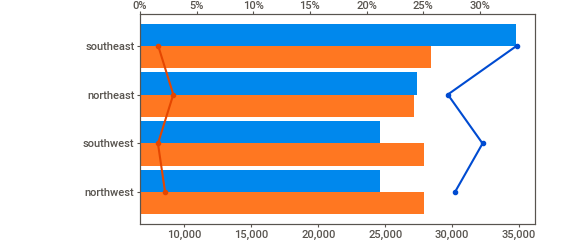
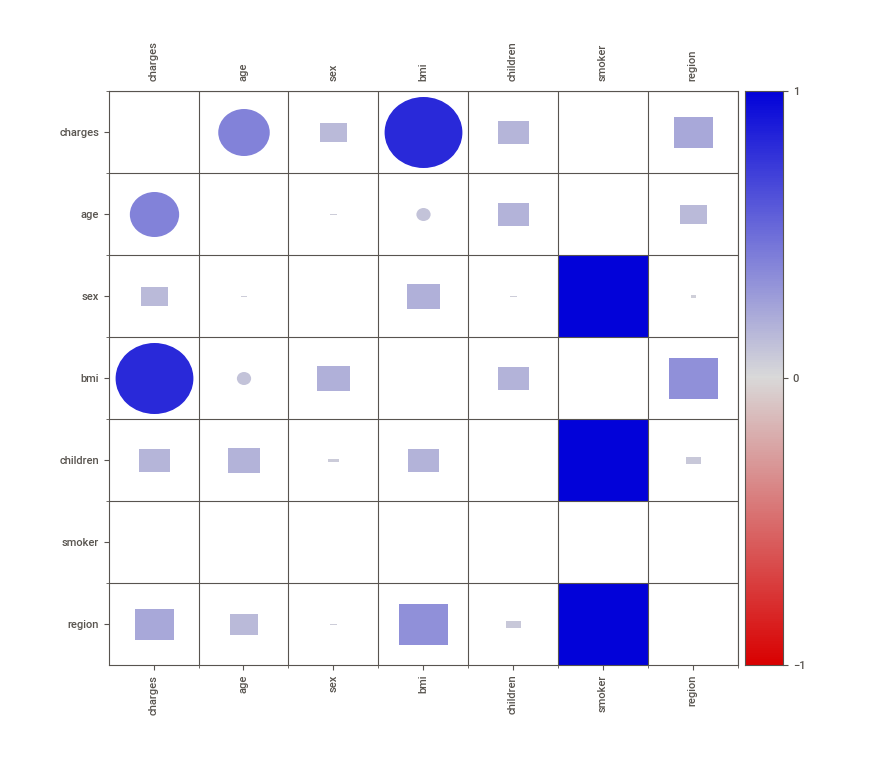
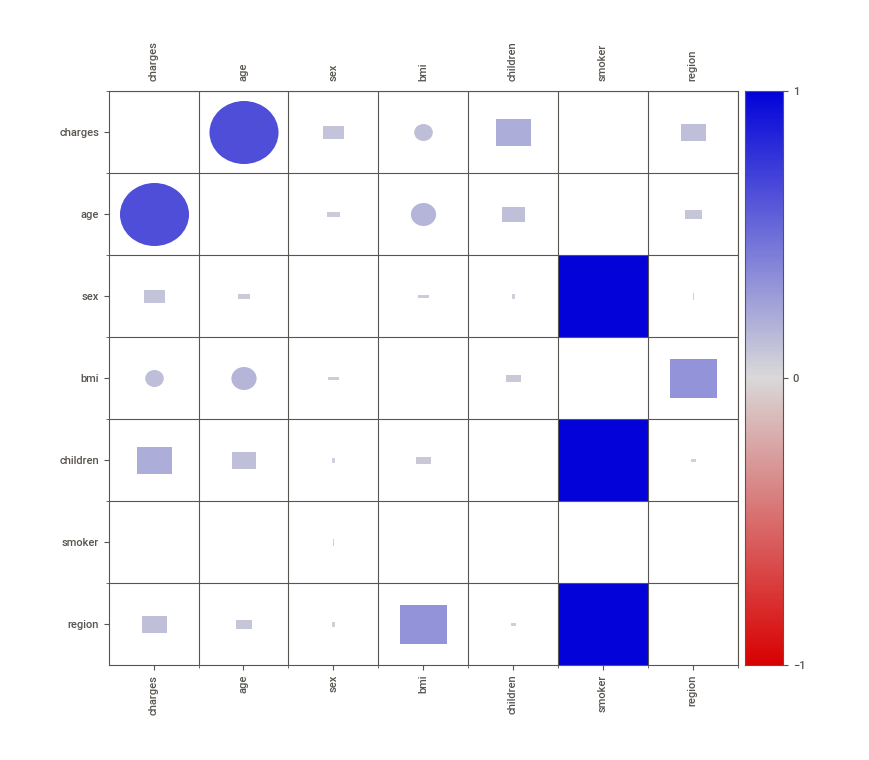

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
eda2.show_notebook()
eda2.show_html(layout = 'vertical')

# Mise en place para Modelagem

Em Machine Learning, em geral, todas as variáveis do conjunto de dados que será utilizado precisam ser númericas. É também interessante que o intervalo de variabilidade das variáveis contínuas não seja tão grande e esteja próximo de zero.

Para tanto, façamos as seguintes transformações:

* Transformar a variável **Fumante** em 0 (não) ou 1 (sim)
* Colocar a variável resposta na escala para cada mil dolares.

Nesta primeira análise vamos considerar só as variáveis:
* var. dependiente: **Custos**
* var. independientes: índice de massa corporal (**IMC**) e ser fumante ou não.
* var. independiente: **sexo** (Homem = 1 ou Mulher = 0.)
* var. independiente: **Idade** variavel contínua.

In [ ]:
dados[('age')].describe()
#dados[('age')].mean()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [ ]:
dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})
dados['charges'] = dados['charges']/1000 
dados['sex'] = dados['sex'].map({'male': 1, 'female': 0})

In [ ]:
dados = dados[['age', 'bmi', 'smoker','sex', 'charges']]
dados.head()

,age,bmi,smoker,sex,charges
0,19,27.900,1,0,16.884924
1,18,33.770,0,1,1.725552
2,28,33.000,0,1,4.449462
3,33,22.705,0,1,21.984471
4,32,28.880,0,1,3.866855


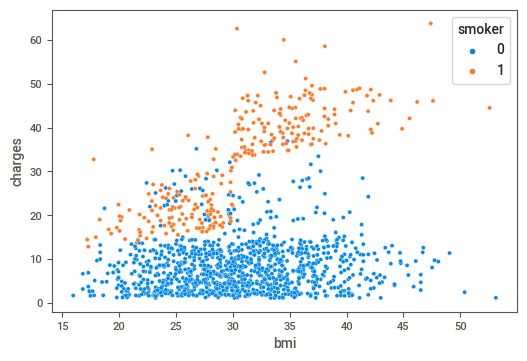

In [ ]:
import seaborn as sns

sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados);

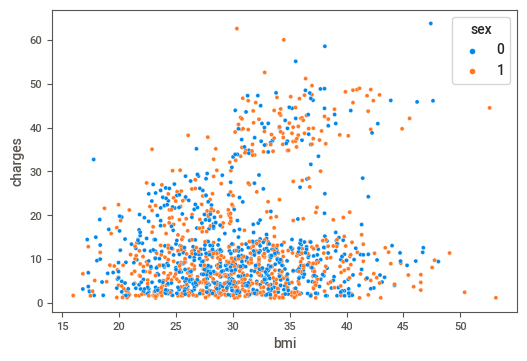

In [ ]:
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'sex', data = dados);

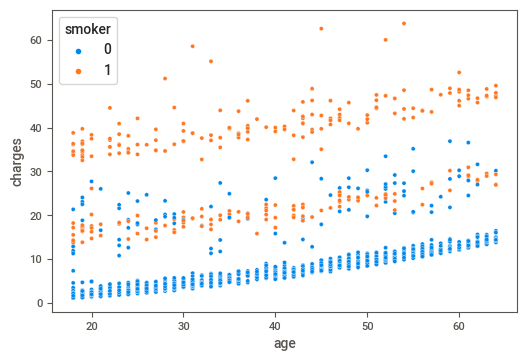

In [ ]:
sns.scatterplot(x = 'age', y = 'charges', hue = 'smoker', data = dados);

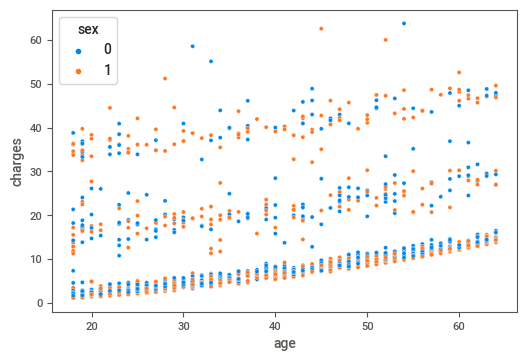

In [ ]:
sns.scatterplot(x = 'age', y = 'charges', hue = 'sex', data = dados);

**Correlação entre variáveis**



In [ ]:
dados.corr()

,age,bmi,smoker,sex,charges
age,1.000000,0.109272,-0.025019,-0.020856,0.299008
bmi,0.109272,1.000000,0.003750,0.046371,0.198341
smoker,-0.025019,0.003750,1.000000,0.076185,0.787251
sex,-0.020856,0.046371,0.076185,1.000000,0.057292
charges,0.299008,0.198341,0.787251,0.057292,1.000000


**Gráfico tridimensional**

Vamos graficar os dados usando duas variáveis quantitativas (IMC e Idade) e uma variavel categórica (Fumante)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot, show, draw, figure, cm
from matplotlib.colors import ListedColormap

#sns.set_style("whitegrid", {'axes.grid' : False})

In [ ]:
#figura = plt.figure(figsize=(6,6))
#ax = fig.axes(projection='3d')

#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(dados['age'], dados['bmi'], dados['charges'], hue = 'smoker', data = dados)
#plt.show()

#grafico=figura.gca(projection='3d')
#grafico.plot(dados['age'], dados['bmi'], dados['charges'], color = 'blue', data = dados)


# **Modelo de Regressão Multipla**


$$Custos = b_0 + b_1 \cdot Idade + b_2 \cdot IMC + b_3 \cdot Fumante $$


Primeiro temos que importar uma biblioteca -> *sklearn.linear_model* 

In [ ]:
X = dados[['age','bmi','smoker']]
y = dados['charges'] 

Para poder avaliar o nosso modelo temos que analisar (estudar) o valor dos erros. Isto é nosso ajuste será melhor quando nosso erro for menor.

Vamos analisar o valor do erro quadrático médio que não é nada mais do que o quadrado da diferença entre o valor real e o valor estimado. 

Este valor pode ser calculado diretamente usando os valores obtidos usando a equação:

$$ eqm = (y - (b_0 + b_1 \cdot Idade + b_2 \cdot IMC + b_3 \cdot Fumante))^2$$


Também podemos usar o comando -> *mean_squared_error* 

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = lm.LinearRegression()
regressor.fit(X, y)
preditos = regressor.predict(X)
eqm = ((y - preditos)**2).mean() 
eqm

37.00539575050757

In [ ]:
from sklearn.metrics import mean_squared_error 
preditos = regressor.predict(X)
eqm = mean_squared_error(y, preditos)
print('EQM : {}'.format(round(eqm, 2)))

EQM : 37.01


In [ ]:
# Resgatando os coeficientes ajustados
regressor.intercept_

-11.676830425187765

In [ ]:
regressao.coef_
#print('b2 = ', lm.regressao.coef_ [1] )
#print('b3 = ', lm.regressao.coef_ [2] )

array([ 0.40120875, 23.48442592])

In [ ]:
regressor.score(X,y)

0.7474771588119513

___
___

## Técnica de Validação: _Holdout Repetido_

Por ser aleatoria a seleção dos conjuntos, é melhor fazer varias vezes este procedimento para poder obter uma estatística e calcular o valor mais estável para o EQM.

In [ ]:
#import numpy as np
import sklearn.linear_model as lm


R = 1000
eqms = [] 

X = dados[['age', 'bmi', 'smoker']]
y = dados['charges'] 

# Técnica HOLDOUT
from sklearn.model_selection import train_test_split 

for i in range(R):
    Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
    regressor = lm.LinearRegression()
    regressor.fit(Xtreino, ytreino)
    preditos = regressor.predict(Xteste)
    eqm = mean_squared_error(yteste, preditos) 
    eqms.append(eqm) 
    
print(np.mean(eqms)) 

37.28050244635745


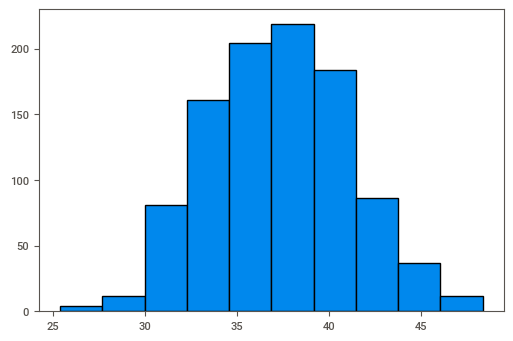

In [ ]:
import matplotlib.pyplot as plt

plt.hist(eqms, edgecolor = 'black')
plt.show()

In [ ]:
from scipy.stats import norm

In [ ]:
def gaussiana(x, H, amp, x0, sigma):
  return H + amp*np.exp(-(x-x0)**2.0/(2.0*sigma**2.0))

# Conclusão

A inclusão da **Idade**  como variável independente diminui o valor do **eqm**, caindo da casa dos 50 para 37.

A realização dos teste de validação mostra que o nosso erro médio quadrático (**eqm**) é consistente, pudendo dizer que nos resultados obtidos, a pesar da ser executado muitas vezes com diferentes conjuntos treino e teste, mostram uma dispersão pequena.

Posteriormente será comparado este modelo  com outros modelos, tambem com a inclusão da variável **Idade** e poder verificar qual modelo é melhor para este caso. 